In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression With One Variable

Linear regression with one variable is implemented to predict profits for a food truck. The file ex1data1.txt contains the dataset for the problem. The first column is the population of a city (/10000) and the second column is the profit (/10000) of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
data_1 = pd.read_csv('lin_reg_1.txt')

xx = data_1['population']
yy = data_1['profit']

data_1.insert(0, 'ones', 1)
data_1.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [3]:
cols = data_1.shape[1] # column number

X = np.matrix(data_1.iloc[:, 0:cols-1].values)   # 1's & population
Y = np.matrix(data_1.iloc[:,cols-1:cols].values) # profit
theta = np.matrix(np.zeros(2))

# parameters for gradient descent
m = len(Y)
alpha = 0.01
iters = 1200

print('dimentions of X: {}, dimentions of Y: {}'.format(X.shape,Y.shape))

dimentions of X: (97, 2), dimentions of Y: (97, 1)


In [4]:
def gradientDescent(X, Y, theta, alpha, iters):
    ''' Stochastic Gradient Descent. '''
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        difference = (X * theta.T) - Y # difference between prediction and true value
        for j in range(parameters):
            term = np.multiply(difference, X[:,j])
            temp[0,j] = theta[0,j] - ( alpha/len(X) * np.sum(term) )
            theta = temp
            # calculate cost
            cost[i] = ( 1/(2*len(Y)) * np.power(difference, 2) ).sum()

    return theta, cost

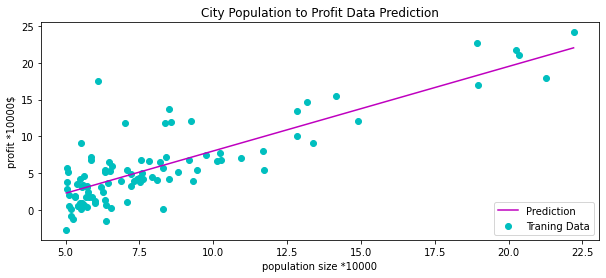

In [5]:
# update theta
theta_update, cost = gradientDescent(X, Y, theta, alpha, iters)

# function that fits the dataset
x = np.linspace(data_1.population.min(), data_1.population.max(), 100) 
fitting_function = theta_update[0,0] + (theta_update[0,1]*x)

# plot results
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(x, fitting_function, c='m', label='Prediction')
ax.scatter(data_1.population, data_1.profit, c='c',label='Traning Data')
ax.set_xlabel('population size *10000')
ax.set_ylabel('profit *10000$')
ax.set_title('City Population to Profit Data Prediction')
ax.legend(loc=4)
plt.show()

In [6]:
data_2 = pd.read_csv('lin_reg_2.txt')
data_2.head()

,house_size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
data_2_norm = (data_2 - data_2.mean())/data_2.std() # normalize
data_2_norm.head()

,house_size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [8]:
data_2_norm.insert(0, 'ones', 1)
cols_m = data_2_norm.shape[1]

X_m = np.matrix(data_2_norm.iloc[:,0:cols_m-1].values)
Y_m = np.matrix(data_2_norm.iloc[:,cols_m-1:cols_m].values)
theta_m = np.matrix(np.zeros(3))

print('dimentions of X_m: {}, dimentions of Y_m: {}'.format(X_m.shape,Y_m.shape))

dimentions of X_m: (47, 3), dimentions of Y_m: (47, 1)


In [9]:
def predict(house_size, bedrooms, theta):
    #normalizing
    house_size = (house_size - data_2.house_size.mean())/data_2.house_size.std()
    bedrooms = (bedrooms - data_2.bedrooms.mean())/data_2.bedrooms.std()
    
    inputs = np.matrix([1, house_size, bedrooms])
    prediction = inputs*theta.T
    
    return float(prediction)

In [10]:
# Gradient Descent
alpha = 0.01
iters = 300
theta_m_update, cost_m = gradientDescent(X_m, Y_m, theta_m, alpha, iters)
print("After {} iterations, theta is {}".format(iters, theta_m_update))

# Predicting 1650 square feed 3 bedroom house price
size_sm = 1650
beds = 3

prediction = predict(size_sm, beds, theta_m_update)
prediction = round(prediction*data_2.price.std() + data_2.price.mean(),2)
print("The price of a {} square meter and {} bedroom house is {}$".format(size_sm, beds, prediction))

After 300 iterations, theta is [[-1.29907905e-16  7.52175361e-01  7.11826700e-02]]
The price of a 1650 square meter and 3 bedroom house is 296919.2$


In [11]:
# Normal Equation
def normalEquation(X_m, y_m): 
    X_T = X_m.T  
    best_params = np.linalg.inv(X_T.dot(X_m)).dot(X_T).dot(y_m)  
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
          
    return best_params # returns a list

In [12]:
data_2.insert(0, 'ones', 1)
X_l = np.matrix(data_2.iloc[:,0:cols_m-1].values)
Y_l = np.matrix(data_2.iloc[:,cols_m-1:cols_m].values)

theta_normal = normalEquation(X_l, Y_l)
inputs = np.matrix([1, size_sm, beds])

prediction_normal = inputs*theta_normal
prediction_normal

matrix([[293081.4643349]])